## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Read data

In [2]:
df = pd.read_csv("../data/netflix_titles.csv", sep=",")

In [3]:
df = df.set_index("show_id")

<Axes: >

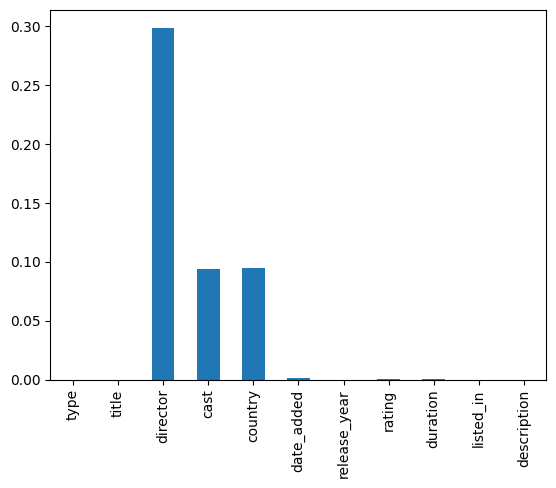

In [37]:
df.isna().mean().plot.bar()

## drop useless columns

In [4]:
## custom transformer sklearn
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

In [5]:
# all this column can be added in the future
col_dropper = columnDropperTransformer(["title", "duration", "rating", "date_added"])

In [6]:
df = col_dropper.transform(df)

## transform list columns

In [7]:
class ColumnJoiner(BaseEstimator, TransformerMixin):
    def __init__(self, sep=' ', cols=None):
        self.sep = sep

        if cols is None:
            self.cols = []
        else:
            self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in self.cols:
            X_[col] = X_[col].str.replace(' ', '').str.replace(',', self.sep)
        return X_


In [8]:
col_joiner = ColumnJoiner(cols=["director", "cast", "listed_in"])
df = col_joiner.transform(df)

### Columns to vectorize
cast, listed_in, description

it will be done separately

In [11]:
from typing import Dict

In [13]:
to_vectorize = ["cast", "listed_in", "description"]

res : Dict[str, pd.DataFrame] = {}
for col in to_vectorize:
    vectorizer = CountVectorizer(min_df=2, stop_words='english', max_features=5000)
    X = vectorizer.fit_transform(df[col].fillna(""))

    X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    cos_sim = cosine_similarity(X)
    res[col] = pd.DataFrame(cos_sim, index=df.index, columns=df.index)

In [16]:
for k in res.keys():
    print(res[k].info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Columns: 8807 entries, s1 to s8807
dtypes: float64(8807)
memory usage: 592.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Columns: 8807 entries, s1 to s8807
dtypes: float64(8807)
memory usage: 592.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Columns: 8807 entries, s1 to s8807
dtypes: float64(8807)
memory usage: 592.5 MB
None


the resulting dict should be used to calculate the distances

In [10]:
res["cast"]["s3"].sort_values(ascending=False).head()

show_id
s3       1.000000
s3298    0.707107
s2669    0.500000
s3747    0.500000
s4004    0.316228
Name: s3, dtype: float64

In [11]:
df.loc["s2669"].cast

'SamiBouajila EriqEbouaney SamySeghir SofiaLesaffre'

In [12]:
df.loc["s3"].cast

'SamiBouajila TracyGotoas SamuelJouy NabihaAkkari SofiaLesaffre SalimKechiouche NoureddineFarihi GeertVanRampelberg BakaryDiombera'

A similarity can be observed, between movie s3 and s2669 in the actors

In [13]:
import pickle

with open("model.pickle", "wb") as f:
    pickle.dump(res, f)

: 

: 